In [6]:
from boosted_lorenzetti.mlflow import load_mlflow_csv
from pathlib import Path
import seaborn as sns
import mplhep
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
plt.style.use(mplhep.style.ATLAS)
mpl.rc('text', usetex = True)

import mlflow
tracking_uri = str(Path.home().absolute() / 'data' / 'lorenzetti' / 'mlruns')
tracking_uri = f'file://{tracking_uri}'
mlflow.set_tracking_uri(tracking_uri)

In [7]:
run_id = '36526048cc9846548f6d7777df78bb9e'
metrics_df = load_mlflow_csv(
    run_id=run_id,
    artifact_path='job_metrics.csv'
)
max_sp = metrics_df['val_max_sp'].max()

metrics_df

,run_id,exec_start,fit_start,train_loss_step,train_acc_step,train_max_sp_step,train_roc_auc_step,train_max_sp_fpr_step,train_max_sp_tpr_step,epoch,...,exec_duration,mlflow.user,mlflow.source.name,mlflow.source.type,mlflow.source.git.commit,model,init,fold,mlflow.parentRunId,mlflow.runName
0,8cbc651d307f471f9fdb369cae0dd4f5,1.754349e+09,1.754349e+09,0.028740,1.00000,1.000000,1.000000,0.000000,1.000000,5.0,...,1215.396989,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,0,0,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
1,dc3f4c13e378441b93c5a8ba3d4d5c01,1.754354e+09,1.754354e+09,0.183195,0.93750,0.974840,0.995833,0.050000,1.000000,5.0,...,1163.935521,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,1,0,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
2,283b9d90e95249dea3d7879b9983672f,1.754358e+09,1.754358e+09,0.077332,0.96875,1.000000,1.000000,0.000000,1.000000,5.0,...,1229.343408,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,4,0,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
3,5af59f1bf851435fbd9b3076825db5de,1.754360e+09,1.754360e+09,0.157256,0.96875,0.972024,0.988095,0.055556,1.000000,5.0,...,1168.562456,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,2,0,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
4,28b2afea05714379875324be7dd9f598,1.754352e+09,1.754352e+09,0.041789,1.00000,1.000000,1.000000,0.000000,1.000000,5.0,...,1235.598042,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,3,0,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
5,80433737cb5a4fc8b931b75360b4bea3,1.754359e+09,1.754359e+09,0.138731,0.96875,1.000000,1.000000,0.000000,1.000000,5.0,...,1228.895017,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,4,1,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
6,575ec2d681a44135b225711a0d3766e3,1.754355e+09,1.754355e+09,0.103137,0.96875,1.000000,1.000000,0.000000,1.000000,5.0,...,1164.864871,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,1,1,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
7,f22f7fe1bbfb49b1a961a3d3dec3675a,1.754353e+09,1.754353e+09,0.039966,1.00000,1.000000,1.000000,0.000000,1.000000,5.0,...,1235.752054,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,3,1,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
8,d17fa9d35b0c4e659d7e468e24c5d9dd,1.754361e+09,1.754361e+09,0.052682,0.96875,1.000000,1.000000,0.000000,1.000000,5.0,...,1160.809376,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,2,1,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17
9,062f8db024fc4828b4af53c29a6a2e73,1.754349e+09,1.754349e+09,0.059748,0.96875,1.000000,1.000000,0.000000,1.000000,5.0,...,1229.154492,lucas.nunes,cli.py,LOCAL,964d6d6e09f9cd3364633b0f8e0a39ab63ca0fc0,MLP,0,1,36526048cc9846548f6d7777df78bb9e,mlp-kfold-multi-init-zee-jf17


In [8]:
val_eval_df = load_mlflow_csv(
    run_id=run_id,
    artifact_path='val_eval_df.csv'
)
val_eval_df

,thresholds,tp,fp,tn,fn,tpr,fpr,acc,sp
0,0.000000,24357,22655,3,0,1.000000,0.999868,0.518133,0.075856
1,0.003344,24356,12893,9765,1,0.999959,0.569026,0.725747,0.685335
2,0.006689,24355,10164,12494,2,0.999918,0.448583,0.783771,0.758925
3,0.010033,24354,8627,14031,3,0.999877,0.380749,0.816442,0.798140
4,0.013378,24354,7646,15012,3,0.999877,0.337453,0.837307,0.822521
...,...,...,...,...,...,...,...,...,...
295,0.986622,0,0,22658,24357,0.000000,0.000000,0.481931,0.000000
296,0.989967,0,0,22658,24357,0.000000,0.000000,0.481931,0.000000
297,0.993311,0,0,22658,24357,0.000000,0.000000,0.481931,0.000000
298,0.996656,0,0,22658,24357,0.000000,0.000000,0.481931,0.000000


/tmp/ipykernel_64092/3317567682.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zoom_ax.set_xticklabels(
/tmp/ipykernel_64092/3317567682.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zoom_ax.set_yticklabels(


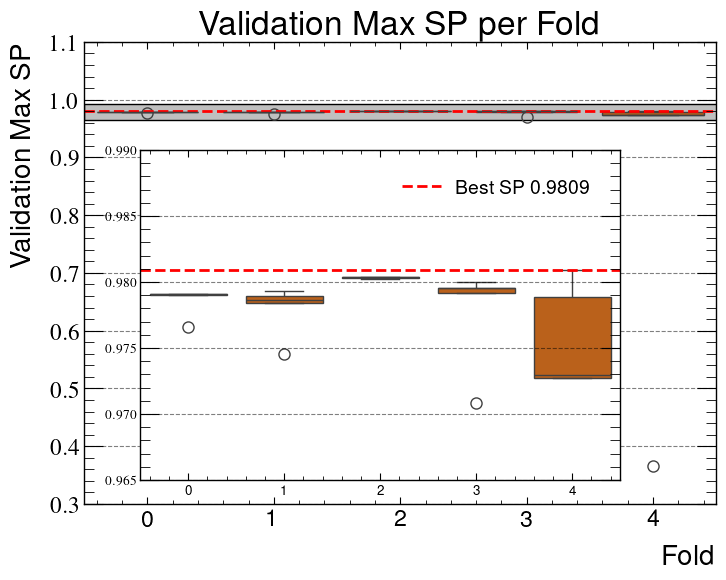

In [14]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5, color='k')
sns.boxplot(
    metrics_df,
    x='fold',
    y='val_max_sp',
    ax=ax
)
ax.set(
    xlabel='Fold',
    ylabel='Validation Max SP',
    title='Validation Max SP per Fold'
)
zoom_xlim = ax.get_xlim()
zoom_ylim=(.965, .99)
rectangle = patches.Rectangle(
    (zoom_xlim[0], zoom_ylim[0]),  # (x, y)
    (zoom_xlim[1] - zoom_xlim[0])*1.1,  # width
    (zoom_ylim[1] - zoom_ylim[0])*1.1,  # height
    linewidth=1,
    linestyle='-',
    edgecolor='k',
    facecolor=(128/256, 128/256, 128/256, .5), #RGBA gray with alpha 0.5
)
ax.add_patch(rectangle)

zoom_ax = fig.add_axes([0.23, 0.2, 0.6, 0.55])
zoom_ax.grid(linestyle='--', alpha=0.5, color='k')
sns.boxplot(
    metrics_df,
    x='fold',
    y='val_max_sp',
    ax=zoom_ax
)
zoom_ax.set(
    xlabel='',
    ylabel='',
    title='',
    ylim=zoom_ylim,
    xlim=zoom_xlim
)
zoom_ax.set_xticklabels(
    zoom_ax.get_xticklabels(),
    fontsize='x-small'
)
zoom_ax.set_yticklabels(
    zoom_ax.get_yticklabels(),
    fontsize='x-small'
)
ax.axhline(max_sp,
           linestyle='--', color='r')
zoom_ax.axhline(max_sp,
                label=f'Best SP {max_sp:.4f}',
                linestyle='--', color='r')
zoom_ax.legend()

/tmp/ipykernel_64092/570027981.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zoom_ax.set_xticklabels(
/tmp/ipykernel_64092/570027981.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  zoom_ax.set_yticklabels(


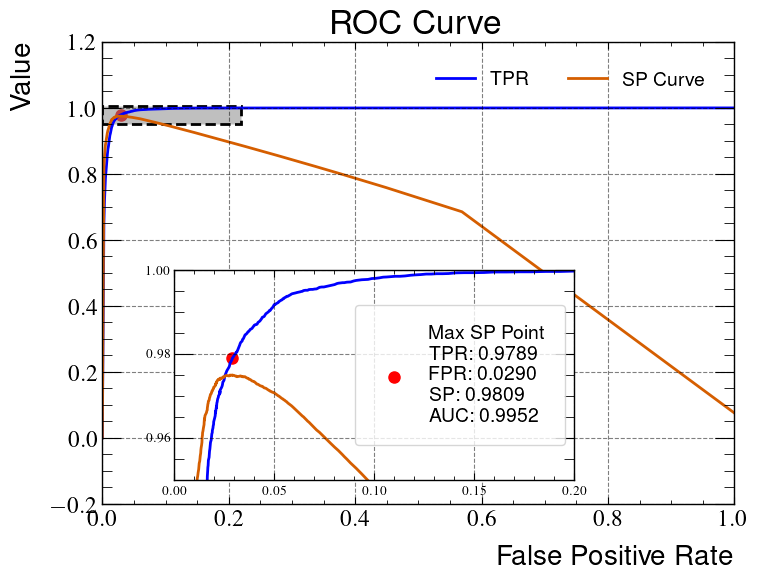

In [15]:
fig, ax = plt.subplots()
val_eval_df.sort_values('fpr', inplace=True)
auc = np.trapezoid(
    val_eval_df['tpr'],
    val_eval_df['fpr']
)
max_sp_idx = val_eval_df['sp'].idxmax()
max_tpr = val_eval_df.loc[max_sp_idx, 'tpr']
max_fpr = val_eval_df.loc[max_sp_idx, 'fpr']
ax.grid(linestyle='--', alpha=0.5, color='k')
ax.plot(val_eval_df['fpr'], val_eval_df['tpr'], color='b', label='TPR')
ax.plot(val_eval_df['fpr'], val_eval_df['sp'], label='SP Curve')
ax.scatter(max_fpr, max_tpr, color='r')
ax.set(
    xlabel='False Positive Rate',
    ylabel='Value',
    title='ROC Curve'
)
zoom_xlim = (0, .2)
zoom_ylim = (.95, 1)
rectangle = patches.Rectangle(
    (zoom_xlim[0], zoom_ylim[0]),  # (x, y)
    (zoom_xlim[1] - zoom_xlim[0])*1.1,  # width
    (zoom_ylim[1] - zoom_ylim[0])*1.1,  # height
    linewidth=2,
    linestyle='--',
    edgecolor='k',
    facecolor=(128/256, 128/256, 128/256, .5), #RGBA gray with alpha 0.5
)
ax.add_patch(rectangle)

zoom_ax = fig.add_axes([0.25, 0.2, 0.5, 0.35])
zoom_ax.grid(linestyle='--', alpha=0.5, color='k')
zoom_ax.plot(val_eval_df['fpr'], val_eval_df['tpr'], color='b')
zoom_ax.plot(val_eval_df['fpr'], val_eval_df['sp'])
zoom_ax.scatter(max_fpr, max_tpr, color='r', label=f'Max SP Point\nTPR: {max_tpr:.4f}\nFPR: {max_fpr:.4f}\n SP: {max_sp:.4f}\n AUC: {auc:.4f}')
zoom_ax.set(
    xlabel='',
    ylabel='',
    title='',
    xlim=zoom_xlim,
    ylim=zoom_ylim
)
zoom_ax.set_xticklabels(
    zoom_ax.get_xticklabels(),
    fontsize='x-small'
)
zoom_ax.set_yticklabels(
    zoom_ax.get_yticklabels(),
    fontsize='x-small'
)
# max_sp = metrics_df['val_max_sp'].max()
# ax.axhline(max_sp,
#            linestyle='--', color='r')
# zoom_ax.axhline(max_sp,
#                 label=f'Best SP {max_sp:.4f}',
#                 linestyle='--', color='r')
ax.legend(frameon=False, loc='upper right', ncols=2)
zoom_ax.legend(frameon=True)